In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
path='./data/'

users = pd.read_csv(path+'users.csv')
books = pd.read_csv(path+'books.csv')
train_ratings = pd.read_csv(path+'train_ratings.csv')
test_ratings = pd.read_csv(path+'test_ratings.csv')

print('users shape: ', users.shape)
print('books shape: ', books.shape)
print('ratings shape: ', train_ratings.shape)
print('ratings shape: ', test_ratings.shape)

users shape:  (68092, 3)
books shape:  (149570, 10)
ratings shape:  (306795, 3)
ratings shape:  (76699, 3)


# 유저 정보에 대한 분석 및 전처리

In [199]:
users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '')
users['location_city'] = users['location'].apply(lambda x: x.split(',')[0])
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1])
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2])

users = users.replace('n/a', np.nan)
users = users.replace('na', np.nan)
users = users.replace('', np.nan)

In [202]:
users[(users['location_city'].notnull())][['location_city', 'location_state', 'location_country']].isnull().sum()

location_city          0
location_state        67
location_country    2092
dtype: int64

In [197]:
modify_location = users[(users['location_country'].isna())&(users['location_city'].notna())]['location_city'].values
location_list = []
for location in modify_location:
    try:
        right_location = users[(users['location'].str.contains(location))&(users['location_country'].notna())]['location'].value_counts().index[0]
        location_list.append(right_location)
    except:
        pass

for location in location_list:
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_state'] = location.split(',')[1]
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_country'] = location.split(',')[2]

/tmp/ipykernel_18869/4134624465.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  right_location = users[(users['location'].str.contains(location))&(users['location_country'].notna())]['location'].value_counts().index[0]
/tmp/ipykernel_18869/4134624465.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  right_location = users[(users['location'].str.contains(location))&(users['location_country'].notna())]['location'].value_counts().index[0]


In [192]:
users[(users['location_city'].notnull())][['location_city', 'location_state', 'location_country']].isnull().sum()

location_city         0
location_state       37
location_country    254
dtype: int64

In [183]:
users[(users['location_city'].notnull())][['location_city', 'location_state', 'location_country']].isnull().sum()

location_city       0
location_state      0
location_country    0
dtype: int64

In [193]:
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'managua'), 'location_state'] = 'managua'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'managua') , 'location_country'] = 'nicaragua'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'aladinma'), 'location_state'] = 'imo state'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'aladinma'), 'location_country'] = 'nigeria'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'llanelli'), 'location_state'] = 'wales'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'llanelli'), 'location_country'] = 'unitedkingdom'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'victoria'), 'location_state'] = 'british columbia'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'victoria'), 'location_country'] = 'canada'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'washington'), 'location_state'] = 'dc'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'washington'), 'location_country'] = 'usa'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'milton'), 'location_state'] = 'massachusetts'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'milton'), 'location_country'] = 'usa'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'york'), 'location_state'] = 'north yorkshire'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'york'), 'location_country'] = 'england'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'chester'), 'location_state'] = 'cheshire'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'chester'), 'location_country'] = 'england'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'orleans'), 'location_state'] = 'ontario'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'orleans'), 'location_country'] = 'canada'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'kent'), 'location_state'] = 'kent'
users.loc[(users['location_city'].notna()) & (users['location_city'] == 'kent'), 'location_country'] = 'england'

#users = users.replace('n/a', np.nan)
#users = users.replace('', np.nan)


In [194]:
users[(users['location_city'].notna())][['location_city', 'location_state', 'location_country']].isna().sum()

location_city         0
location_state       36
location_country    224
dtype: int64

In [176]:
users[(users['location_city'].notna())][['location_city', 'location_state', 'location_country']].isna().sum().value_counts()

0      1
36     1
225    1
Name: count, dtype: int64

In [4]:
users.head()

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,68092.0,139381.329539,80523.969862,8.0,69008.75,138845.5,209388.25,278854.0
age,40259.0,36.069873,13.842571,5.0,25.00,34.0,45.00,99.0


In [129]:
users['location_city'] = users['location'].apply(lambda x: x.split(',')[0].strip())
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1].strip())
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2].strip())

users = users.replace('n/a', np.nan)
users = users.replace('', np.nan)

users['location_country'].value_counts()

location_country
usa                             43992
canada                           6208
germany                          3526
united kingdom                   2914
australia                        1791
                                ...  
district of columbia                1
west indies                         1
kosovo                              1
tonga                               1
australian capital territory        1
Name: count, Length: 343, dtype: int64

In [130]:
users.isna().sum()/len(users)

user_id             0.000000
location            0.000000
age                 0.408756
location_city       0.001366
location_state      0.046569
location_country    0.031164
dtype: float64

In [131]:
users[(users['location_country'].isna())&(users['location_state'].notnull())].isna().sum()

user_id               0
location              0
age                 346
location_city         2
location_state        0
location_country    623
dtype: int64

In [132]:
users[(users['location_city'].notna())][['location_city', 'location_state', 'location_country']].isna().sum()

location_city          0
location_state      3119
location_country    2112
dtype: int64

In [133]:
modify_location = users[(users['location_country'].isna())&(users['location_city'].notnull())]['location_city'].values
location_list = []
for location in modify_location:
    try:
        right_location = users[(users['location'].str.contains(location))&(users['location_country'].notnull())]['location'].value_counts().index[0]
        location_list.append(right_location)
    except:
        pass

/tmp/ipykernel_18869/3274669727.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  right_location = users[(users['location'].str.contains(location))&(users['location_country'].notnull())]['location'].value_counts().index[0]
/tmp/ipykernel_18869/3274669727.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  right_location = users[(users['location'].str.contains(location))&(users['location_country'].notnull())]['location'].value_counts().index[0]


In [134]:
users[(users['location_city'].notna())][['location_city', 'location_state', 'location_country']].isna().sum()

location_city          0
location_state      3119
location_country    2112
dtype: int64

In [86]:
# state는 있는데 country가 없는 경우
state_list = users[(users['location_country'].isna())&(users['location_state'].notnull())]['location_state'].values

country_list = []
for state in state_list:
    try:
        right_location = users[(users['location_state'] == state)&(users['location_country'].notnull())]['location_country'][0]
        country_list.append(right_location)
    except:
        country_list.append(np.nan)

for state, country in zip(state_list, country_list):
    if pd.isna(country):
        continue
    users.loc[users[users['location_state']==state].index, 'location_country'] = country

In [87]:
# city는 있는데 country가 없는 경우
city_list = users[(users['location_country'].isna())&(users['location_city'].notnull())]['location_city'].values

country_list = []
for city in city_list:
    try:
        right_location = users[(users['location_city'] == city)&(users['location_country'].notnull())]['location_country'][0]
        country_list.append(right_location)
    except:
        country_list.append(np.nan)

for city, country in zip(city_list, country_list):
    if pd.isna(country):
        continue
    users.loc[users[users['location_city']==city].index, 'location_country'] = country

In [88]:
# city는 있는데 state가 없는 경우
city_list = users[(users['location_state'].isna())&(users['location_city'].notnull())]['location_city'].values

state_list = []
for city in city_list:
    try:
        right_location = users[(users['location_city'] == city)&(users['location_state'].notnull())]['location_country'][0]
        state_list.append(right_location)
    except:
        state_list.append(np.nan)

for city, state in zip(city_list, state_list):
    if pd.isna(state):
        continue
    users.loc[users[users['location_city']==city].index, 'location_state'] = state

In [39]:
users.isna().sum()/len(users) #결측치가 어느정도의 비율을 차지하는지 알려줌

user_id             0.000000
location            0.000000
age                 0.408756
location_city       0.001366
location_state      0.046569
location_country    0.030870
dtype: float64

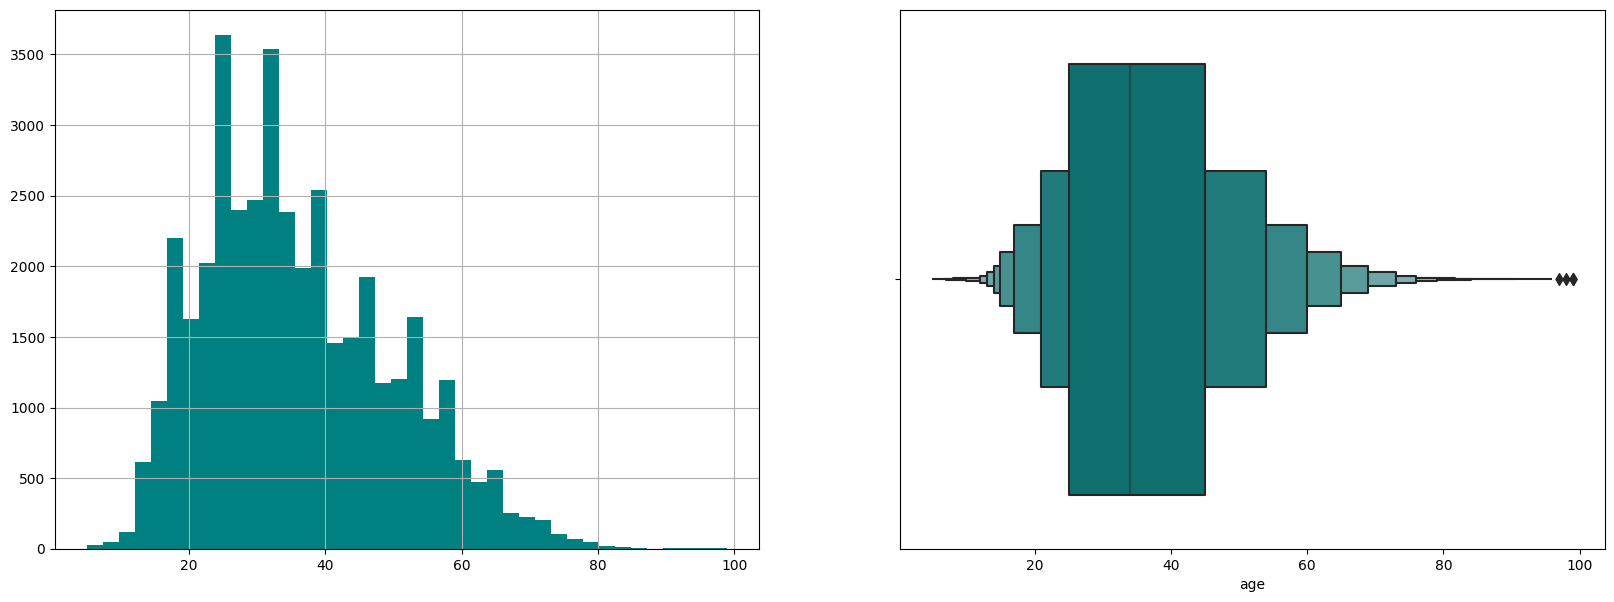

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

users['age'].hist(bins=40, color='teal', ax=ax[0])
sns.boxenplot(data=users, x='age', color='teal', ax=ax[1])

plt.show()

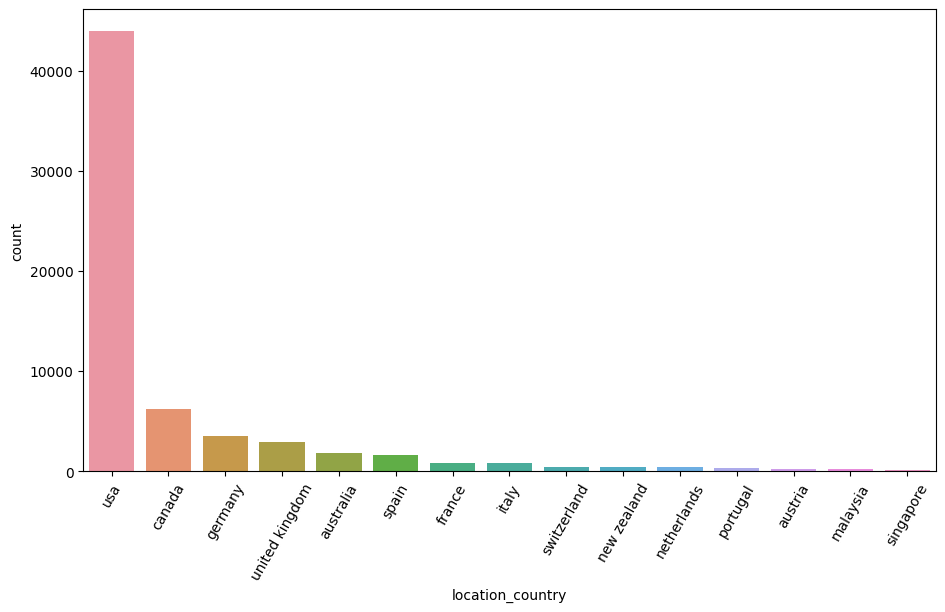

In [47]:
country_dict = (users['location_country'].value_counts()).to_dict()
count = pd.DataFrame(list(country_dict.items()), columns=['location_country', 'count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
fig=plt.figure(figsize=(11, 6))
ax = sns.barplot(y='count', x='location_country', data=f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
plt.show()

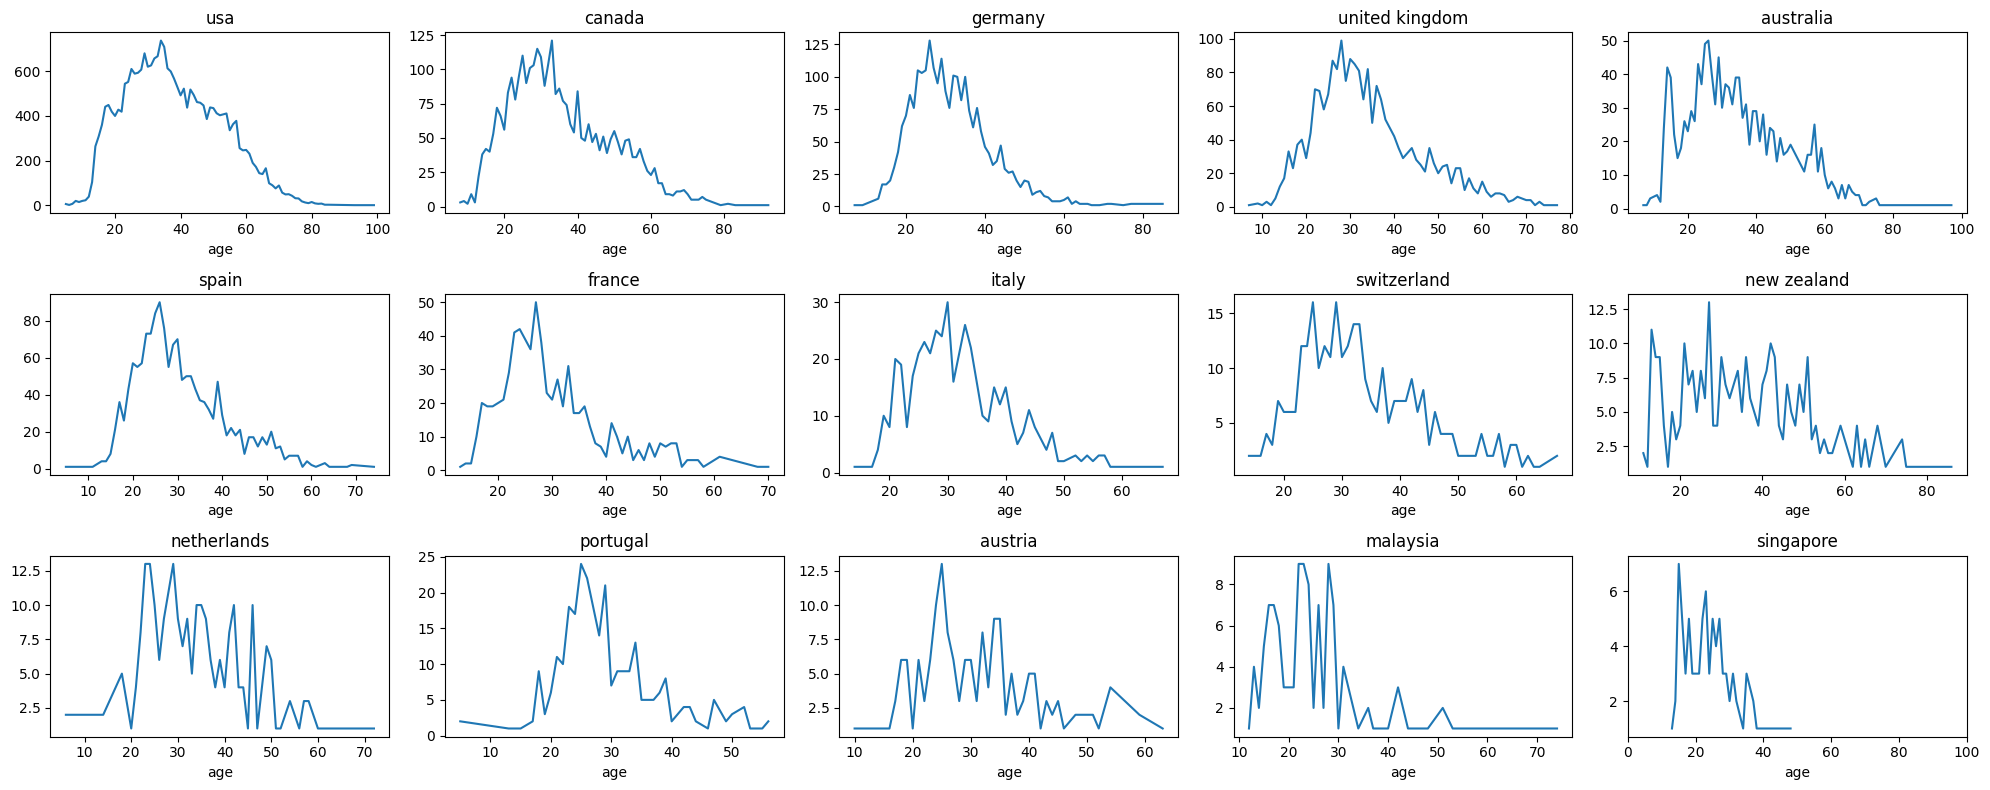

In [48]:
fig, ax = plt.subplots(3,5,figsize=(20,8))
for country, ax_ in zip(f['location_country'], ax.flatten()):
    users[(users['location_country']==country)]['age'].value_counts().sort_index().plot(ax=ax_, title=country)
plt.xlim(0,100)
plt.tight_layout()
plt.show()

In [89]:
from sklearn.impute import KNNImputer
train_df = train_ratings.merge(users, on='user_id', how='left')

# 인덱싱 처리
loc_city2idx = {v:k for k,v in enumerate(train_df['location_city'].unique())}
loc_state2idx = {v:k for k,v in enumerate(train_df['location_state'].unique())}
loc_country2idx = {v:k for k,v in enumerate(train_df['location_country'].unique())}
isbn2idx = {v:k for k,v in enumerate(train_df['isbn'].unique())}

train_df['location_city'] = train_df['location_city'].map(loc_city2idx)
train_df['location_state'] = train_df['location_state'].map(loc_state2idx)
train_df['location_country'] = train_df['location_country'].map(loc_country2idx)
train_df['isbn'] = train_df['isbn'].map(isbn2idx)

train_df = train_df.drop(columns=['location'])
print(train_df.info())

idx = {
        "loc_city2idx":loc_city2idx,
        "loc_state2idx":loc_state2idx,
        "loc_country2idx":loc_country2idx,
        "isbn2idx":isbn2idx
}    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306795 entries, 0 to 306794
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           306795 non-null  int64  
 1   isbn              306795 non-null  int64  
 2   rating            306795 non-null  int64  
 3   age               214133 non-null  float64
 4   location_city     306795 non-null  int64  
 5   location_state    306795 non-null  int64  
 6   location_country  306795 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 16.4 MB
None


In [92]:
print(train_df)

imputer = KNNImputer(n_neighbors=3)
imputation_result = imputer.fit_transform(train_df)

imputation_result

        user_id    isbn  rating   age  location_city  location_state   
0             8       0       4   NaN              0               0  \
1         67544       0       7  30.0              1               0   
2        123629       0       8   NaN              2               0   
3        200273       0       8   NaN              3               0   
4        210926       0       9   NaN              4               0   
...         ...     ...     ...   ...            ...             ...   
306790   278843  129772       7  28.0           1606               5   
306791   278851  129773       6  33.0             19              10   
306792   278851  129774       7  33.0             19              10   
306793   278851  129775       7  33.0             19              10   
306794   278851  129776      10  33.0             19              10   

        location_country  
0                      0  
1                      0  
2                      0  
3                      0  


array([[8.00000e+00, 0.00000e+00, 4.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.75440e+04, 0.00000e+00, 7.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.23629e+05, 0.00000e+00, 8.00000e+00, ..., 2.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.78851e+05, 1.29774e+05, 7.00000e+00, ..., 1.90000e+01,
        1.00000e+01, 1.00000e+00],
       [2.78851e+05, 1.29775e+05, 7.00000e+00, ..., 1.90000e+01,
        1.00000e+01, 1.00000e+00],
       [2.78851e+05, 1.29776e+05, 1.00000e+01, ..., 1.90000e+01,
        1.00000e+01, 1.00000e+00]])

In [95]:
fill_age_df = pd.DataFrame(imputation_result, columns=train_df.columns)

In [96]:
fill_age_df

,user_id,isbn,rating,age,location_city,location_state,location_country
0,8.0,0.0,4.0,34.666667,0.0,0.0,0.0
1,67544.0,0.0,7.0,30.000000,1.0,0.0,0.0
2,123629.0,0.0,8.0,41.000000,2.0,0.0,0.0
3,200273.0,0.0,8.0,37.666667,3.0,0.0,0.0
4,210926.0,0.0,9.0,31.333333,4.0,0.0,0.0
...,...,...,...,...,...,...,...
306790,278843.0,129772.0,7.0,28.000000,1606.0,5.0,1.0
306791,278851.0,129773.0,6.0,33.000000,19.0,10.0,1.0
306792,278851.0,129774.0,7.0,33.000000,19.0,10.0,1.0
306793,278851.0,129775.0,7.0,33.000000,19.0,10.0,1.0


In [101]:
grouped = fill_age_df.groupby('user_id').agg({'age':'mean'}).round(0)

grouped

,age
user_id,
8.0,35.0
9.0,35.0
12.0,35.0
14.0,35.0
16.0,37.0
...,...
278846.0,23.0
278849.0,23.0
278851.0,33.0


In [135]:
impute_users = users.drop(columns=['age']).merge(grouped, on='user_id', how='left')
impute_users

,user_id,location,location_city,location_state,location_country,age
0,8,"timmins, ontario, canada",timmins,ontario,canada,35.0
1,11400,"ottawa, ontario, canada",ottawa,ontario,canada,49.0
2,11676,"n/a, n/a, n/a",NaN,NaN,NaN,34.0
3,67544,"toronto, ontario, canada",toronto,ontario,canada,30.0
4,85526,"victoria, british columbia, canada",victoria,british columbia,canada,36.0
...,...,...,...,...,...,...
68087,278376,"danville, pennsylvania, usa",danville,pennsylvania,usa,54.0
68088,278621,"victoria, delaware, canada",victoria,delaware,canada,74.0
68089,278636,"irvington, alabama, usa",irvington,alabama,usa,29.0
68090,278659,"vancouver, washington, usa",vancouver,washington,usa,33.0


In [140]:
impute_users['age'] = impute_users['age'].fillna(int(impute_users['age'].mean()))

In [141]:
impute_users.to_csv('impute_users.csv', index=False)

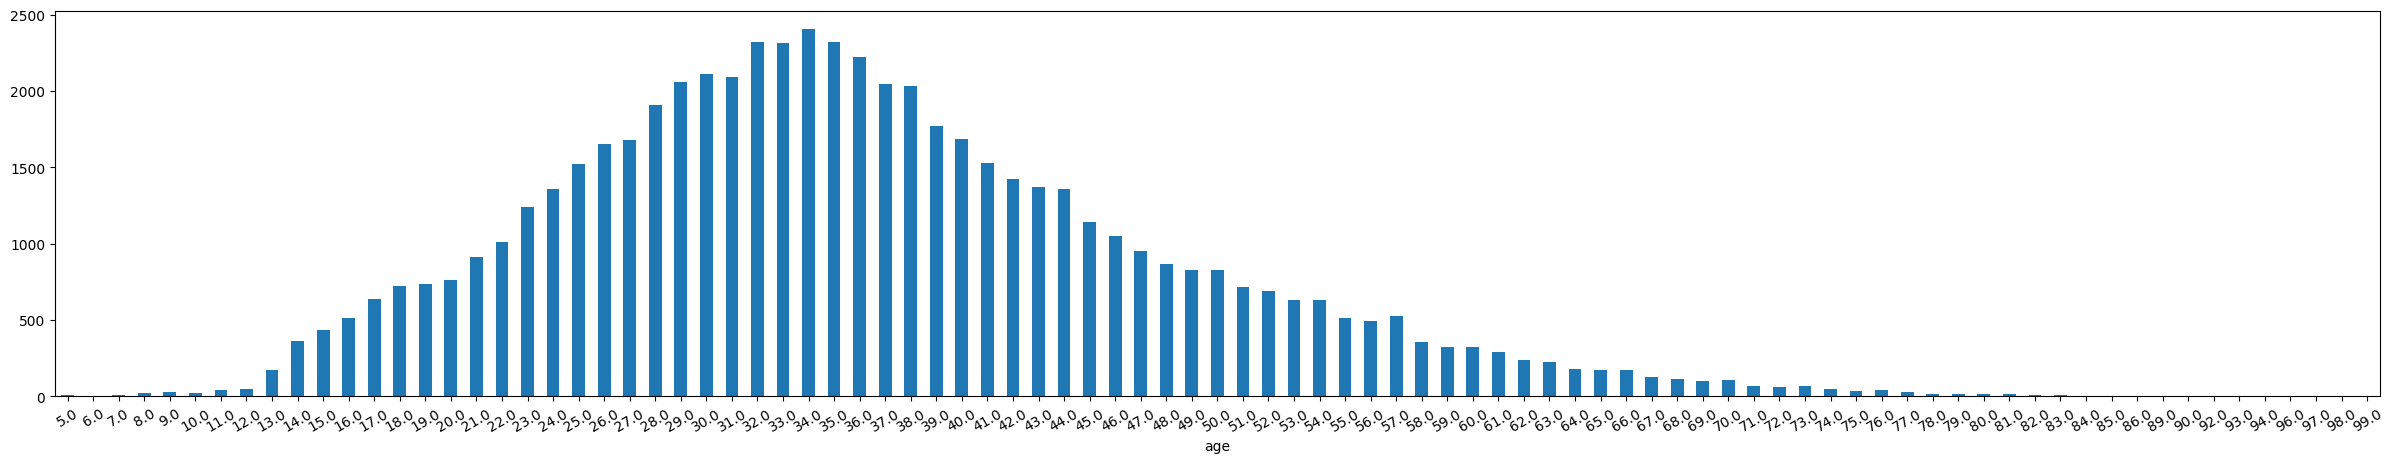

In [142]:
plt.figure(figsize=(30,5))
grouped['age'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=30)
plt.show()

In [159]:
users = pd.read_csv(path+'users.csv')
users

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0
...,...,...,...
68087,278376,"danville, pennsylvania, usa",54.0
68088,278621,"victoria, delaware, canada",74.0
68089,278636,"irvington, alabama, usa",NaN
68090,278659,"vancouver, washington, usa",33.0


In [158]:
impute_users = users.drop(columns=['age']).merge(grouped, on='user_id', how='left')
impute_users['age'] = impute_users['age'].fillna(int(impute_users['age'].mean()))
impute_users.to_csv('impute_users.csv', index=False)
impute_users

,user_id,location,age
0,8,"timmins, ontario, canada",35.0
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",34.0
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0
...,...,...,...
68087,278376,"danville, pennsylvania, usa",54.0
68088,278621,"victoria, delaware, canada",74.0
68089,278636,"irvington, alabama, usa",29.0
68090,278659,"vancouver, washington, usa",33.0
